<a href="https://colab.research.google.com/github/Fliptoss/ML_stuff/blob/main/PracticeSimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [30]:
#read the csv data
df = pd.read_csv('Salary_Data.csv')

In [31]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


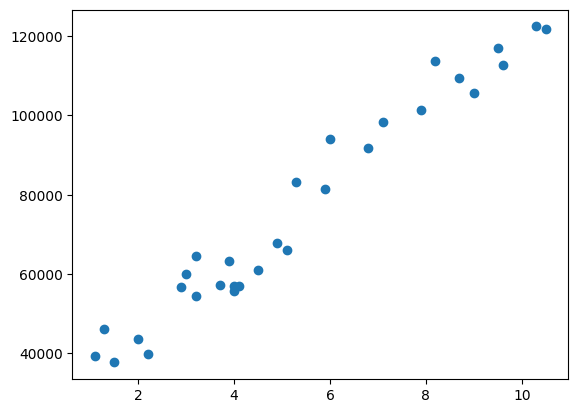

In [32]:
plt.scatter(df['YearsExperience'], df['Salary'])

In [33]:
# now we seperate the independent feature and the dependent feature
X = df[['YearsExperience']]

In [34]:
y = df['Salary']

In [35]:
# perform train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
import seaborn as sns

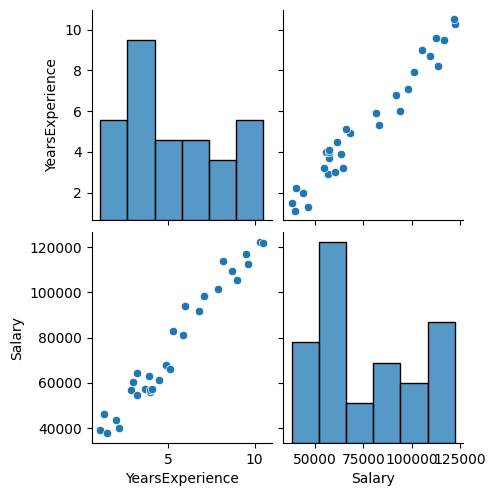

In [37]:
sns.pairplot(df)

In [38]:
## perform standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
X_train = scaler.fit_transform(X_train)

In [40]:
X_test = scaler.transform(X_test)

In [41]:
X_test = scaler.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:
## apply linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [43]:
regression.fit(X_train, y_train)

LinearRegression()

In [44]:
print("Coefficient or slope: ", regression.coef_)
print("Intercept: ", regression.intercept_)

Coefficient or slope:  [25063.1519945]
Intercept:  70416.40909090909


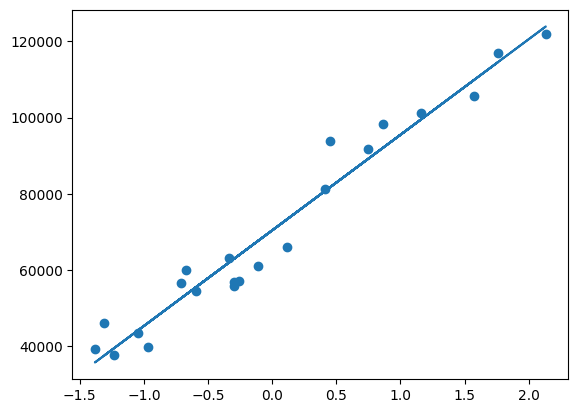

In [45]:
#plot
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

In [46]:
# Predict on the test data
y_pred = regression.predict(X_test)

In [48]:
# perform metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [49]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(mae)
print(mse)
print(rmse)

59083.48423918735
3735786168.4491253
61121.0779391948


In [51]:
# R squared
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

In [52]:
score

-5.284848188371746

In [53]:
# adjusted r2
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-6.332322886433704

In [54]:
# perform OLS
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

In [55]:
model

In [57]:
prediction = model.predict(X_test)

In [58]:
prediction

array([-28104.17847334, -44571.97666609, -33009.48006267, -43170.46192629,
       -50528.41431028, -48776.52088552, -25651.52767867, -31257.58663791])

In [60]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.112
Model:                            OLS   Adj. R-squared (uncentered):              0.070
Method:                 Least Squares   F-statistic:                              2.645
Date:                Thu, 15 May 2025   Prob (F-statistic):                       0.119
Time:                        14:18:22   Log-Likelihood:                         -276.85
No. Observations:                  22   AIC:                                      555.7
Df Residuals:                      21   BIC:                                      556.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------